# Sishir Yeety Capstone 1

milestone 1: https://docs.google.com/document/d/1nE_xoHAVr05yQXmPfOvWT4EDC0Xcp8-ByZOkRPr2clo/edit


In [340]:
import xlrd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import pandas as pd
import time
import seaborn as sns
from datetime import datetime

In [341]:
basic_df = pd.read_excel("basic.xlsx")
advanced_df = pd.read_excel('advanced.xlsx')

In [342]:
basic_df.head()

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,8035.0,1986.0,A.C. Green,NaN,PF,22.0,LAL,82.0,1.0,1542.0,...,0.611,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0
1,8420.0,1987.0,A.C. Green,NaN,PF,23.0,LAL,79.0,72.0,2240.0,...,0.780,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0
2,8807.0,1988.0,A.C. Green,NaN,PF,24.0,LAL,82.0,64.0,2636.0,...,0.773,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0
3,9242.0,1989.0,A.C. Green,NaN,PF,25.0,LAL,82.0,82.0,2510.0,...,0.786,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0
4,9688.0,1990.0,A.C. Green,1750000,PF,26.0,LAL,82.0,82.0,2709.0,...,0.751,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0


In [343]:
advanced_df.head()

,year,tm,player,age,g,mp,per,ts,3par,ftr,...,d_worp,adjusted_worp,estimated_position,bbref_pos,age_on_feb_1,yrs_experience,height,weight,rounded_position,rounded_age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,...,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,...,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,...,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,...,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,...,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0


In [344]:
# Let's wrangle the basic statistics first!

# get rid of all players before 2008
basic_df = basic_df[basic_df['Season Start'] >= 2005]

basic_df['Season Start'].unique()

array([2017., 2010., 2011., 2012., 2013., 2014., 2015., 2008., 2009.,
       2016., 2005., 2006., 2007.])

In [345]:
basic_df.head()

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24,24304.0,2017.0,A.J. Hammons,1312611,C,24.0,DAL,22.0,0.0,163.0,...,0.450,8.0,28.0,36.0,4.0,1.0,13.0,10.0,21.0,48.0
25,20357.0,2010.0,A.J. Price,762195,PG,23.0,IND,56.0,2.0,865.0,...,0.800,12.0,76.0,88.0,106.0,35.0,3.0,59.0,53.0,410.0
26,20966.0,2011.0,A.J. Price,854389,PG,24.0,IND,50.0,0.0,795.0,...,0.667,16.0,56.0,72.0,111.0,29.0,1.0,53.0,61.0,323.0
27,21529.0,2012.0,A.J. Price,885120,PG,25.0,IND,44.0,1.0,568.0,...,0.800,13.0,48.0,61.0,86.0,20.0,2.0,32.0,30.0,172.0
28,22100.0,2013.0,A.J. Price,NaN,PG,26.0,WAS,57.0,22.0,1278.0,...,0.790,20.0,94.0,114.0,205.0,33.0,3.0,64.0,73.0,441.0


In [346]:
basic_df['blank2'].unique()

array([nan])

In [347]:
basic_df.columns

Index(['#', 'Season Start', 'Player Name', 'Player Salary in $', 'Pos', 'Age',
       'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS',
       'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [348]:
basic_df = basic_df.drop(['blank2', '#'], axis=1)

In [349]:
basic_df.columns

Index(['Season Start', 'Player Name', 'Player Salary in $', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [350]:
basic_df = basic_df.drop(['blanl'], axis=1)

In [351]:
basic_df.columns

Index(['Season Start', 'Player Name', 'Player Salary in $', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [352]:
basic_df[basic_df['Player Name'] == 'LeBron James']

# I see some NaN here and there

,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14936,2005.0,LeBron James,4621800,SF,20.0,CLE,80.0,80.0,3388.0,25.7,...,0.750,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0
14937,2006.0,LeBron James,5828090,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,0.738,75.0,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0
14938,2007.0,LeBron James,13041250,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,0.698,83.0,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0
14939,2008.0,LeBron James,14410581,SF,23.0,CLE,75.0,74.0,3027.0,29.1,...,0.712,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0
14940,2009.0,LeBron James,15779912,SF,24.0,CLE,81.0,81.0,3054.0,31.7,...,0.780,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0
14941,2010.0,LeBron James,NaN,SF,25.0,CLE,76.0,76.0,2966.0,31.1,...,0.767,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0
14942,2011.0,LeBron James,16022500,SF,26.0,MIA,79.0,79.0,3063.0,27.3,...,0.759,80.0,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0
14943,2012.0,LeBron James,17545000,SF,27.0,MIA,62.0,62.0,2326.0,30.7,...,0.771,94.0,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0
14944,2013.0,LeBron James,19067500,PF,28.0,MIA,76.0,76.0,2877.0,31.6,...,0.753,97.0,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0
14945,2014.0,LeBron James,20644400,PF,29.0,MIA,77.0,77.0,2902.0,29.3,...,0.750,81.0,452.0,533.0,488.0,121.0,26.0,270.0,126.0,2089.0


In [353]:
advanced_df = advanced_df[advanced_df['year'] >= 2005]

advanced_df.head()

,year,tm,player,age,g,mp,per,ts,3par,ftr,...,d_worp,adjusted_worp,estimated_position,bbref_pos,age_on_feb_1,yrs_experience,height,weight,rounded_position,rounded_age
11082,2005,CLE,LeBron James,20,80,3388,25.7,0.554,0.183,0.378,...,4.1,20.3,2.8,3.0,20.09,1.0,80.0,240.0,3.0,20.0
11083,2005,NYK,Stephon Marbury,27,82,3281,21.9,0.575,0.248,0.420,...,-4.2,10.6,1.0,1.0,27.95,8.0,74.0,180.0,1.0,28.0
11084,2005,WAS,Gilbert Arenas,23,80,3274,21.3,0.565,0.369,0.420,...,-2.7,11.7,1.2,1.0,23.07,3.0,75.0,191.0,1.0,23.0
11085,2005,PHO,Joe Johnson,23,82,3240,15.1,0.556,0.314,0.153,...,0.3,8.3,2.9,3.0,23.60,3.0,79.0,240.0,3.0,24.0
11086,2005,HOU,Tracy McGrady,25,78,3182,22.9,0.526,0.262,0.336,...,4.7,17.2,2.4,3.0,25.70,7.0,80.0,210.0,2.0,26.0


In [354]:
# make columns easier

basic_df.columns = basic_df.columns.str.replace(' ', '_')

In [355]:
basic_df = basic_df.rename(columns={'Season_Start':'year', 'Player_Name':'name', 
                                    'Player_Salary_in_$':'salary'})

# change salary back to float64
basic_df['salary'] = basic_df['salary'].apply(pd.to_numeric)

In [356]:
# Average Salary by year
basic_df.groupby('year').salary.mean()

year
2005.0    4.453176e+06
2006.0    4.235206e+06
2007.0    4.838416e+06
2008.0    5.132801e+06
2009.0    4.947311e+06
2010.0    4.843674e+06
2011.0    5.047860e+06
2012.0    4.933904e+06
2013.0    4.785782e+06
2014.0    4.448235e+06
2015.0    5.045022e+06
2016.0    6.350269e+06
2017.0    7.220413e+06
Name: salary, dtype: float64

In [357]:
basic_df[basic_df['name']=='Kevin Durant']

,year,name,salary,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
13951,2008.0,Kevin Durant,4484040.0,SG,19.0,SEA,80.0,80.0,2768.0,15.8,...,0.873,70.0,278.0,348.0,192.0,78.0,75.0,232.0,122.0,1624.0
13952,2009.0,Kevin Durant,4796880.0,SF,20.0,OKC,74.0,74.0,2885.0,20.8,...,0.863,77.0,405.0,482.0,205.0,96.0,53.0,225.0,134.0,1871.0
13953,2010.0,Kevin Durant,6053663.0,SF,21.0,OKC,82.0,82.0,3239.0,26.2,...,0.900,105.0,518.0,623.0,231.0,112.0,84.0,271.0,171.0,2472.0
13954,2011.0,Kevin Durant,15506632.0,SF,22.0,OKC,78.0,78.0,3038.0,23.6,...,0.880,57.0,476.0,533.0,214.0,88.0,76.0,218.0,159.0,2161.0
13955,2012.0,Kevin Durant,16669630.0,SF,23.0,OKC,66.0,66.0,2546.0,26.2,...,0.860,40.0,487.0,527.0,231.0,88.0,77.0,248.0,133.0,1850.0
13956,2013.0,Kevin Durant,17832627.0,SF,24.0,OKC,81.0,81.0,3119.0,28.3,...,0.905,46.0,594.0,640.0,374.0,116.0,105.0,280.0,143.0,2280.0
13957,2014.0,Kevin Durant,18995624.0,SF,25.0,OKC,81.0,81.0,3122.0,29.8,...,0.873,58.0,540.0,598.0,445.0,103.0,59.0,285.0,174.0,2593.0
13958,2015.0,Kevin Durant,20158622.0,SF,26.0,OKC,27.0,27.0,913.0,27.6,...,0.854,16.0,162.0,178.0,110.0,24.0,25.0,74.0,40.0,686.0
13959,2016.0,Kevin Durant,26540100.0,SF,27.0,OKC,72.0,72.0,2578.0,28.2,...,0.898,45.0,544.0,589.0,361.0,69.0,85.0,250.0,137.0,2029.0
13960,2017.0,Kevin Durant,25000000.0,SF,28.0,GSW,62.0,62.0,2070.0,27.6,...,0.875,39.0,474.0,513.0,300.0,66.0,99.0,138.0,117.0,1555.0


In [358]:
# Normalize minutes played to minutes/game

basic_df["MPG"] = basic_df['MP']/basic_df['G']

# normalize pts scored to ppg

basic_df['PPG'] = basic_df['PTS']/basic_df['G']

In [359]:
basic_df[basic_df['name'] == 'LeBron James']

,year,name,salary,Pos,Age,Tm,G,GS,MP,PER,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG,PPG
14936,2005.0,LeBron James,4621800.0,SF,20.0,CLE,80.0,80.0,3388.0,25.7,...,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0,42.350000,27.187500
14937,2006.0,LeBron James,5828090.0,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0,42.544304,31.367089
14938,2007.0,LeBron James,13041250.0,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0,40.897436,27.333333
14939,2008.0,LeBron James,14410581.0,SF,23.0,CLE,75.0,74.0,3027.0,29.1,...,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0,40.360000,30.000000
14940,2009.0,LeBron James,15779912.0,SF,24.0,CLE,81.0,81.0,3054.0,31.7,...,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0,37.703704,28.444444
14941,2010.0,LeBron James,NaN,SF,25.0,CLE,76.0,76.0,2966.0,31.1,...,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0,39.026316,29.710526
14942,2011.0,LeBron James,16022500.0,SF,26.0,MIA,79.0,79.0,3063.0,27.3,...,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0,38.772152,26.721519
14943,2012.0,LeBron James,17545000.0,SF,27.0,MIA,62.0,62.0,2326.0,30.7,...,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,37.516129,27.145161
14944,2013.0,LeBron James,19067500.0,PF,28.0,MIA,76.0,76.0,2877.0,31.6,...,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0,37.855263,26.789474
14945,2014.0,LeBron James,20644400.0,PF,29.0,MIA,77.0,77.0,2902.0,29.3,...,452.0,533.0,488.0,121.0,26.0,270.0,126.0,2089.0,37.688312,27.129870


In [360]:
advanced_df.columns.values

array(['year', 'tm', 'player', 'age', 'g', 'mp', 'per', 'ts', '3par',
       'ftr', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'usg',
       'column_s', 'ows', 'dws', 'ws', 'ws_48', 'column_x', 'obpm',
       'dbpm', 'bpm', 'vorp', 'ows_48', 'dws_48', 'shot', 'player_id',
       'team_mar', 'team_mp', 'team_gm', 'year_3par', 'team_ts', 'tm_usg',
       'tm_ts_w_o_plyr', 'reb_vers', 'defense', 'val_shot', 'offense',
       'mpg_int', 'raw_spm', 'min', 'raw_contrib', 'tm_sum', 'tm_adj',
       'bpm_2', 'stderr', 'contrib', 'vorp_2', 'reb_vers_2', 'val_shot_2',
       'offense_2', 'defense_2', 'mpg', 'raw_obpm', 'contrib_2',
       'tm_ortg', 'tm_sum_2', 'tm_adj_2', 'tm_drtg', 'obpm_2', 'ostderr',
       'ocontrib', 'ovorp', 'dbpm_2', 'dstderr', 'dcontrib', 'dvorp',
       'sum_spm', 'min_2', 'mpg_2', 'rempg', 'bpm_3', 'contrib_3',
       'vorp_3', 'vorp_gm', 'o_bpm', 'ocontrib_2', 'ovorp_2', 'ovorp_gm',
       'd_bpm', 'dcontrib_2', 'dvorp_2', 'dvorp_gm', 'production',
       'prod

In [361]:
# replace NaN with column averages and change to float for calculations

basic_df['salary']=basic_df['salary'].fillna(basic_df['salary'].mean())
basic_df['salary'] = basic_df['salary'].astype(float)

In [362]:
basic_df.head()

,year,name,salary,Pos,Age,Tm,G,GS,MP,PER,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG,PPG
24,2017.0,A.J. Hammons,1.312611e+06,C,24.0,DAL,22.0,0.0,163.0,8.4,...,28.0,36.0,4.0,1.0,13.0,10.0,21.0,48.0,7.409091,2.181818
25,2010.0,A.J. Price,7.621950e+05,PG,23.0,IND,56.0,2.0,865.0,14.0,...,76.0,88.0,106.0,35.0,3.0,59.0,53.0,410.0,15.446429,7.321429
26,2011.0,A.J. Price,8.543890e+05,PG,24.0,IND,50.0,0.0,795.0,10.7,...,56.0,72.0,111.0,29.0,1.0,53.0,61.0,323.0,15.900000,6.460000
27,2012.0,A.J. Price,8.851200e+05,PG,25.0,IND,44.0,1.0,568.0,11.5,...,48.0,61.0,86.0,20.0,2.0,32.0,30.0,172.0,12.909091,3.909091
28,2013.0,A.J. Price,5.143812e+06,PG,26.0,WAS,57.0,22.0,1278.0,12.4,...,94.0,114.0,205.0,33.0,3.0,64.0,73.0,441.0,22.421053,7.736842


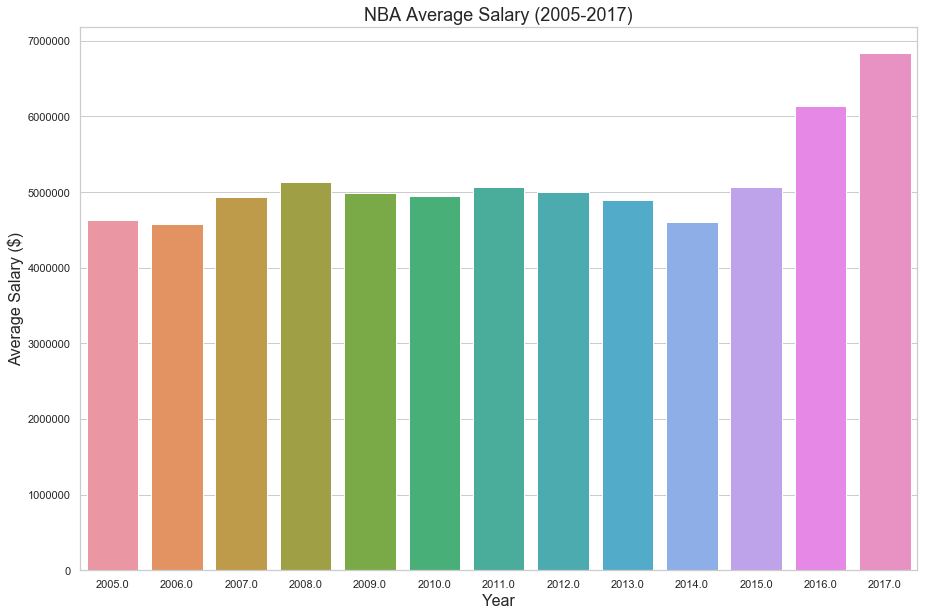

In [363]:
average = pd.DataFrame(basic_df.groupby('year').salary.mean())
average['year'] = average.index

_ = sns.set(style="whitegrid", rc={'figure.figsize':(15,10)})
_ = sns.barplot(x='year', y="salary", data=average)
_ = plt.xlabel('Year', fontsize=16)
_ = plt.ylabel('Average Salary ($)', fontsize=16)
_ = plt.title('NBA Average Salary (2005-2017)', fontsize=18)

In [364]:
# salary cap values 2005-2017

# 2005: 49500000
# 2006: 53135000
# 2007: 58680000
# 2008: 58680000
# 2009: 57700000
# 2010: 58044000
# 2011: 58044000
# 2012: 58044000
# 2013: 58679000
# 2014: 63065000
# 2015: 70000000
# 2016: 94143000
# 2017: 99093000

# lets normalize the salaries due to inflation, basically % of cap / dollars

basic_df.loc[basic_df.year == 2005, 'cap'] = basic_df.salary / 49500000
basic_df.loc[basic_df.year == 2006, 'cap'] = basic_df.salary / 53135000
basic_df.loc[basic_df.year == 2007, 'cap'] = basic_df.salary / 58680000
basic_df.loc[basic_df.year == 2008, 'cap'] = basic_df.salary / 58680000
basic_df.loc[basic_df.year == 2009, 'cap'] = basic_df.salary / 57700000
basic_df.loc[basic_df.year == 2010, 'cap'] = basic_df.salary / 58044000
basic_df.loc[basic_df.year == 2011, 'cap'] = basic_df.salary / 58044000
basic_df.loc[basic_df.year == 2012, 'cap'] = basic_df.salary / 58044000
basic_df.loc[basic_df.year == 2013, 'cap'] = basic_df.salary / 58679000
basic_df.loc[basic_df.year == 2014, 'cap'] = basic_df.salary / 63065000
basic_df.loc[basic_df.year == 2015, 'cap'] = basic_df.salary / 70000000
basic_df.loc[basic_df.year == 2016, 'cap'] = basic_df.salary / 94143000
basic_df.loc[basic_df.year == 2017, 'cap'] = basic_df.salary / 99093000

basic_df.head()

,year,name,salary,Pos,Age,Tm,G,GS,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,MPG,PPG,cap
24,2017.0,A.J. Hammons,1.312611e+06,C,24.0,DAL,22.0,0.0,163.0,8.4,...,36.0,4.0,1.0,13.0,10.0,21.0,48.0,7.409091,2.181818,0.013246
25,2010.0,A.J. Price,7.621950e+05,PG,23.0,IND,56.0,2.0,865.0,14.0,...,88.0,106.0,35.0,3.0,59.0,53.0,410.0,15.446429,7.321429,0.013131
26,2011.0,A.J. Price,8.543890e+05,PG,24.0,IND,50.0,0.0,795.0,10.7,...,72.0,111.0,29.0,1.0,53.0,61.0,323.0,15.900000,6.460000,0.014720
27,2012.0,A.J. Price,8.851200e+05,PG,25.0,IND,44.0,1.0,568.0,11.5,...,61.0,86.0,20.0,2.0,32.0,30.0,172.0,12.909091,3.909091,0.015249
28,2013.0,A.J. Price,5.143812e+06,PG,26.0,WAS,57.0,22.0,1278.0,12.4,...,114.0,205.0,33.0,3.0,64.0,73.0,441.0,22.421053,7.736842,0.087660


In [365]:
pd.DataFrame(basic_df.groupby('year').cap.mean())

,cap
year,
2005.0,0.093565
2006.0,0.086085
2007.0,0.084108
2008.0,0.087521
2009.0,0.086485
2010.0,0.085166
2011.0,0.087381
2012.0,0.086158
2013.0,0.083337
